#EDA 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# 1. What is the range of selling prices in the dataset?

min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"The minimum selling price is: {min_price}")
print(f"The maximum selling price is: {max_price}")
print(f"The range of selling prices is: {price_range}")


The minimum selling price is: 5000
The maximum selling price is: 760000
The range of selling prices is: 755000


In [ ]:
#2. What is the median selling price for bikes in the dataset?

median_price = df['selling_price'].median()

print(f"The median selling price is: {median_price}")


The median selling price is: 45000.0


In [ ]:
# 3. What is the most common seller type?

most_common_seller_type = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller_type}")


The most common seller type is: Individual


In [ ]:
#4.  How many bikes have driven more than 50,000 kilometers?

bikes_over_50k = df[df['km_driven'] > 50000]
num_bikes_over_50k = len(bikes_over_50k)

print(f"The number of bikes that have driven more than 50,000 kilometers is: {num_bikes_over_50k}")


The number of bikes that have driven more than 50,000 kilometers is: 170


In [ ]:
#5.  How many bikes have driven more than 50,000 kilometers type?

bikes_over_50k = df[df['km_driven'] > 50000]
num_bikes_over_50k = len(bikes_over_50k)

print(f"The number of bikes that have driven more than 50,000 kilometers is: {num_bikes_over_50k}")


The number of bikes that have driven more than 50,000 kilometers is: 170


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?

proportion_2015_older = len(df[df['year'] <= 2015]) / len(df)

print(f"The proportion of bikes from 2015 or older is: {proportion_2015_older}")


The proportion of bikes from 2015 or older is: 0.5664467483506126


Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing Value Percentages:
 name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


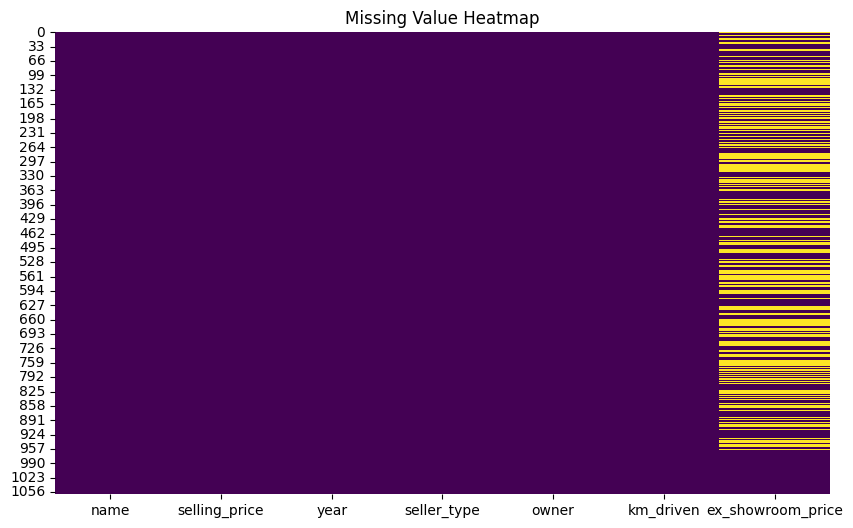

In [ ]:
#7.  What is the trend of missing values across the dataset?

import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

print("Missing Values:\n", missing_values)
print("\nMissing Value Percentages:\n", missing_percentage)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name'].iloc[0]

print(f"The highest ex_showroom_price is: {highest_ex_showroom_price}")
print(f"The bike with the highest ex_showroom_price is: {bike_with_highest_price}")


The highest ex_showroom_price is: 1278000.0
The bike with the highest ex_showroom_price is: Harley-Davidson Street Bob


In [ ]:
#9. What is the total number of bikes listed by each seller type?


bike_counts_by_seller = df.groupby('seller_type')['name'].count()

bike_counts_by_seller


,name
seller_type,
Dealer,6
Individual,1055


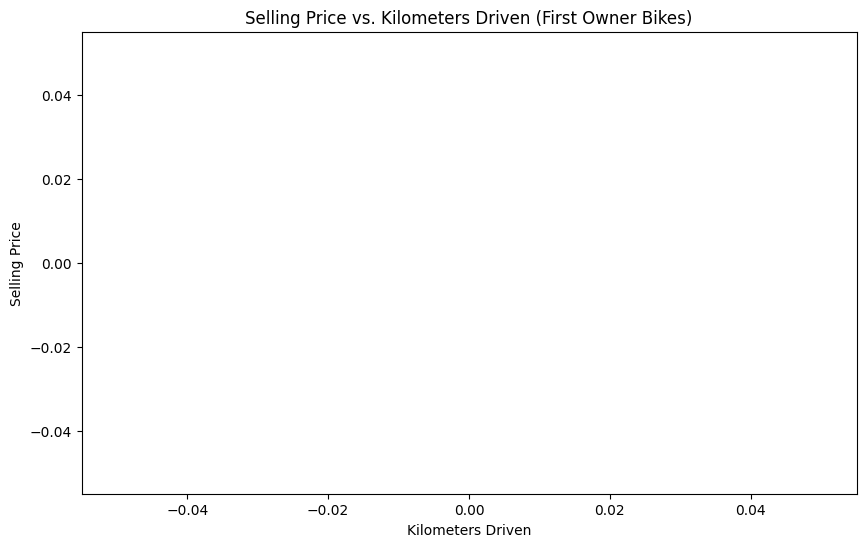

The correlation between selling price and km_driven for first-owner bikes is: nan


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

import matplotlib.pyplot as plt

first_owner_bikes = df[df['owner'] == 'First Owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs. Kilometers Driven (First Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"The correlation between selling price and km_driven for first-owner bikes is: {correlation}")


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

num_outliers_removed = len(df) - len(df_no_outliers)
print(f"Number of outliers removed: {num_outliers_removed}")


Number of outliers removed: 39


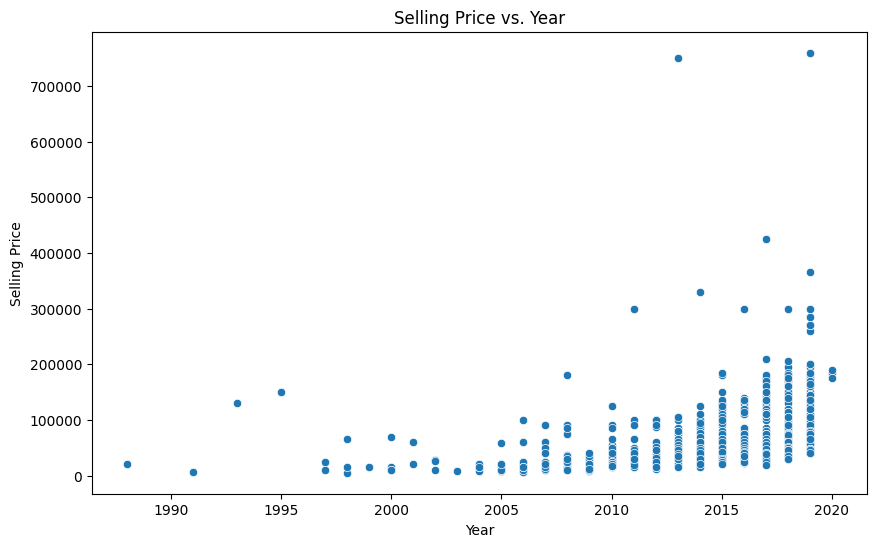

The correlation between selling price and year is: 0.40218840061474403


In [ ]:
#12.  Perform a bivariate analysis to visualize the relationship between year and selling_price.

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

correlation = df['year'].corr(df['selling_price'])
print(f"The correlation between selling price and year is: {correlation}")


In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year)?

import pandas as pd

df['bike_age'] = pd.Timestamp.now().year - df['year']

average_price_by_age = df.groupby('bike_age')['selling_price'].mean()

newest_bike_average_price = average_price_by_age.iloc[0]
depreciation_by_age = newest_bike_average_price - average_price_by_age

average_depreciation = depreciation_by_age.mean()

print(f"The average depreciation in selling price based on the bike's age is: {average_depreciation}")


The average depreciation in selling price based on the bike's age is: 134018.11257686943


In [ ]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year

average_price_by_year = df.groupby('year')['selling_price'].mean()

df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))

threshold = 1.5
significantly_above_average = df[df['selling_price'] > threshold * df['selling_price_avg']]

bike_names_above_average = significantly_above_average['name']

bike_names_above_average


,name
2,Royal Enfield Classic Gunmetal Grey
7,Royal Enfield Bullet 350 [2007-2011]
13,Yamaha YZF R3
18,Royal Enfield Classic Gunmetal Grey
23,Jawa Standard
...,...
979,Royal Enfield Thunder 500
981,Royal Enfield Thunder 350
983,Royal Enfield Classic 350
984,Royal Enfield Classic 500


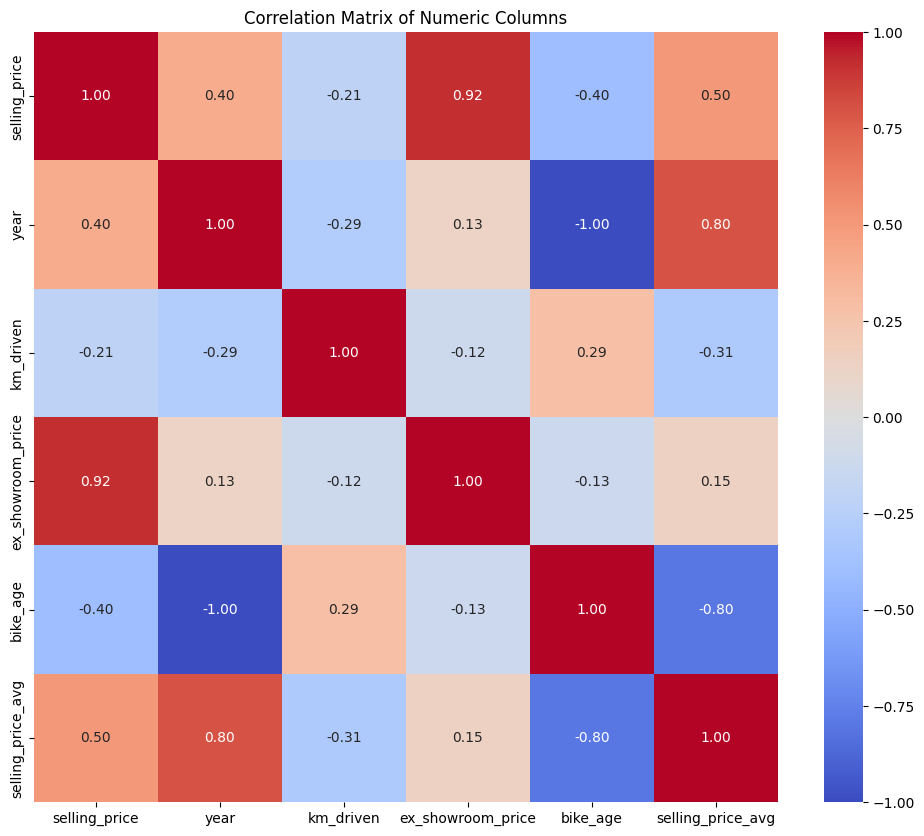

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=np.number)

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


#EDA-2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

# Group data by dealer and calculate the average selling price
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

# Display the average selling price for each dealer
print(average_price_by_dealer)

# Compare average prices across dealers (example: find the dealer with the highest average price)
highest_average_price = average_price_by_dealer.max()
dealer_with_highest_price = average_price_by_dealer[average_price_by_dealer == highest_average_price].index[0]

print(f"\nThe dealer with the highest average selling price is {dealer_with_highest_price} at ${highest_average_price:.2f}")


Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

# Calculate the standard deviation of prices for each car company
price_variation_by_company = df.groupby('Company')['Price ($)'].std()

# Find the company with the highest price variation
highest_variation_company = price_variation_by_company.idxmax()
highest_variation_amount = price_variation_by_company.max()

print(f"The car brand with the highest price variation is {highest_variation_company} with a standard deviation of ${highest_variation_amount:.2f}")

# Interpretation of pricing trends based on variation
print("\nInterpretation:")
if highest_variation_amount > 10000: # Example threshold - adjust as needed
    print(f"The high price variation for {highest_variation_company} suggests a wide range of models or configurations, potentially including both luxury and budget-friendly options.")
    print("This could indicate diverse pricing strategies to target different customer segments.")
else:
    print(f"The price variation for {highest_variation_company} is relatively moderate.")
    print("This might indicate a more focused product line or less variability in model features.")


The car brand with the highest price variation is Lincoln with a standard deviation of $19658.05

Interpretation:
The high price variation for Lincoln suggests a wide range of models or configurations, potentially including both luxury and budget-friendly options.
This could indicate diverse pricing strategies to target different customer segments.


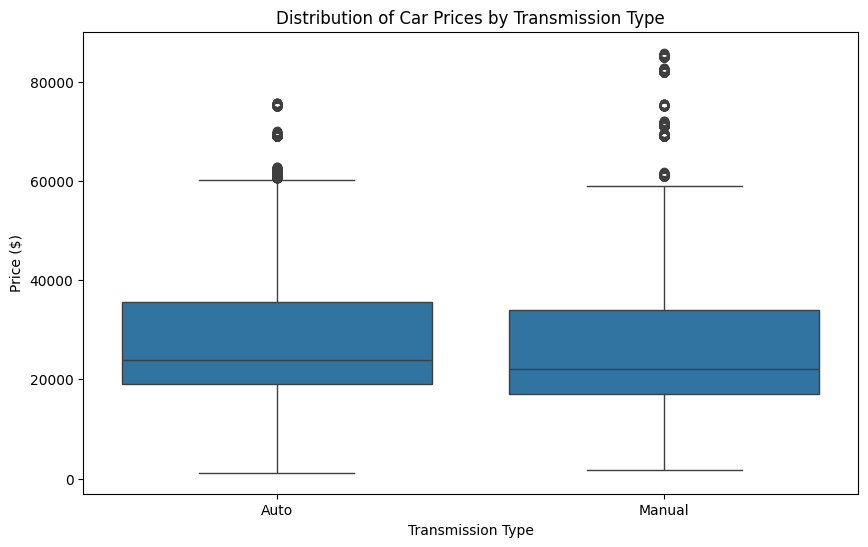

Interquartile Ranges (IQRs) for each transmission type:


,Price ($)
Transmission,
Auto,16500.0
Manual,17000.0


In [ ]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
# compare?

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

transmission_iqr = df.groupby('Transmission')['Price ($)'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("Interquartile Ranges (IQRs) for each transmission type:")
transmission_iqr


In [ ]:
#4.  What is the distribution of car prices across different regions

import matplotlib.pyplot as plt
import seaborn as sns

if 'Region' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='Price ($)', data=df)
    plt.title('Distribution of Car Prices Across Different Regions')
    plt.xlabel('Region')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Calculate descriptive statistics for price in each region
    price_stats_by_region = df.groupby('Region')['Price ($)'].describe()
    print(price_stats_by_region)

else:
    print("The 'Region' column is not present in the dataset.")


The 'Region' column is not present in the dataset.


Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


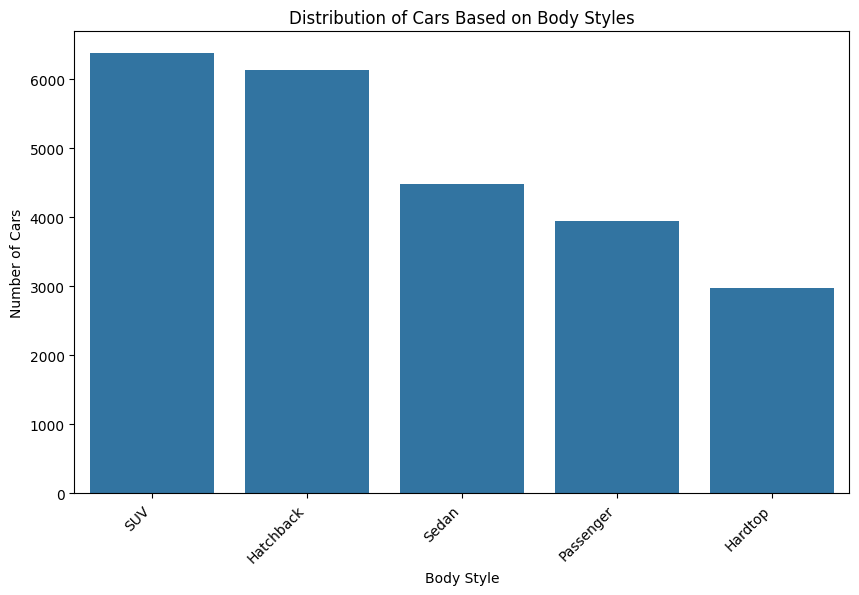

In [ ]:
#5.  What is the distribution of cars based on body styles

import matplotlib.pyplot as plt

if 'Body Style' in df.columns:
    body_style_counts = df['Body Style'].value_counts()
    print(body_style_counts)

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Body Style', data=df, order=body_style_counts.index)
    plt.title('Distribution of Cars Based on Body Styles')
    plt.xlabel('Body Style')
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("The 'Body Style' column is not present in the dataset.")


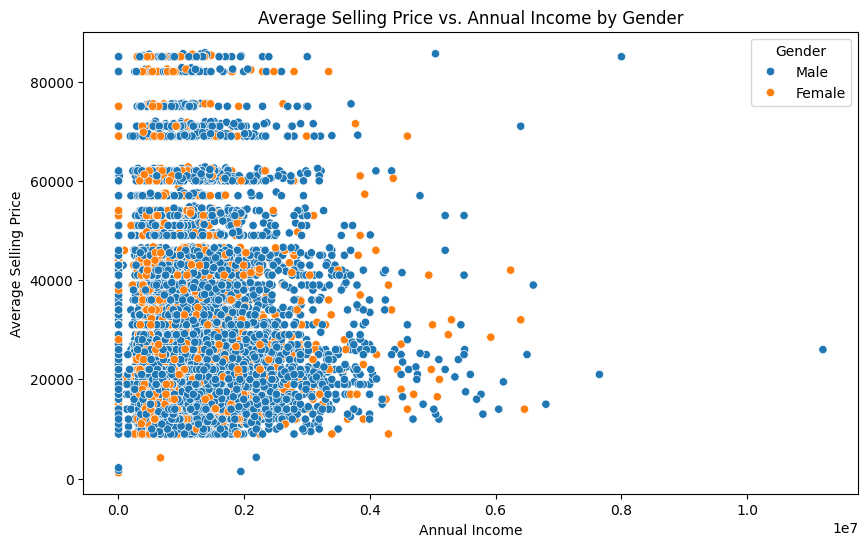

,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df)
plt.title('Average Selling Price vs. Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.show()

average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
s
average_price_by_gender_income




In [ ]:
#7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region

import matplotlib.pyplot as plt


if 'Region' in df.columns:

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='Price ($)', data=df)
    plt.title('Distribution of Car Prices by Region')
    plt.xlabel('Region')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='Region', data=df)
    plt.title('Number of Cars Sold by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    region_stats = df.groupby('Region').agg({'Price ($)': ['mean', 'median', 'std'], 'Car_ID': 'count'})
    print(region_stats)

else:
    print("The 'Region' column is not present in the dataset.")


The 'Region' column is not present in the dataset.


In [ ]:
#8.  How does the average car price differ between cars with different engine sizes

import matplotlib.pyplot as plt

average_price_by_engine = df.groupby('Engine Size')['Price ($)'].mean()

print(average_price_by_engine)

plt.figure(figsize=(10, 6))
average_price_by_engine.plot(kind='bar')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


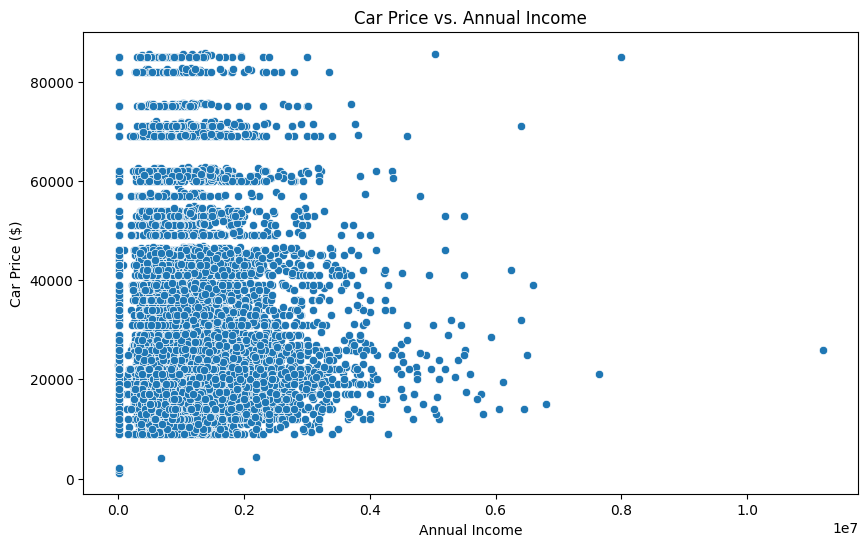

0.25     386000.0
0.50     735000.0
0.75    1175750.0
Name: Annual Income, dtype: float64


<ipython-input-24-fd79ade1ee64>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income_bracket = df.groupby(pd.qcut(df['Annual Income'], q=4))['Price ($)'].mean()


,Price ($)
Annual Income,
"(10079.999, 386000.0]",27954.276468
"(386000.0, 735000.0]",27974.380371
"(735000.0, 1175750.0]",28288.664936
"(1175750.0, 11200000.0]",28144.058223


In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket

import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df)
plt.title('Car Price vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.show()


income_brackets = df['Annual Income'].quantile([0.25, 0.5, 0.75])
print(income_brackets)

average_price_by_income_bracket = df.groupby(pd.qcut(df['Annual Income'], q=4))['Price ($)'].mean()

average_price_by_income_bracket



Top 5 Car Models with Highest Sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


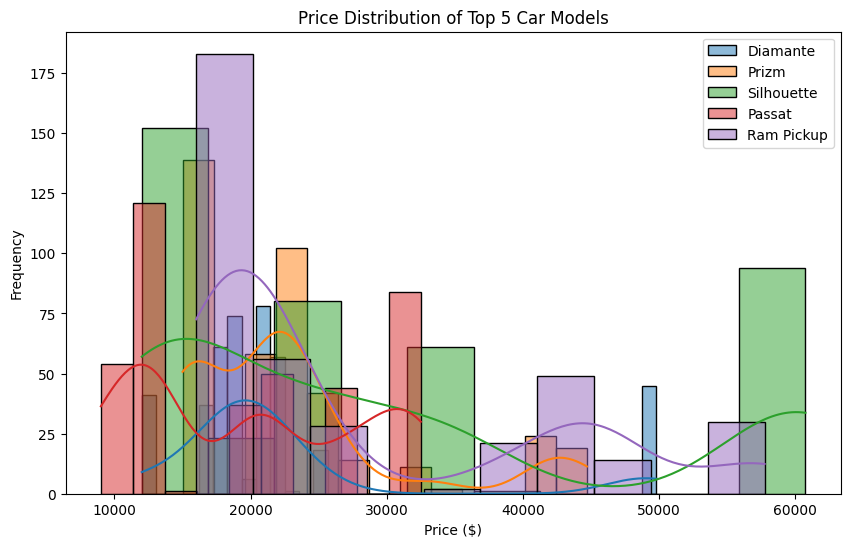

In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

import pandas as pd
import matplotlib.pyplot as plt


if 'Model' in df.columns:
    top_5_models = df['Model'].value_counts().head(5)
    print("Top 5 Car Models with Highest Sales:\n", top_5_models)

    plt.figure(figsize=(10, 6))
    for model in top_5_models.index:
        sns.histplot(df[df['Model'] == model]['Price ($)'], label=model, kde=True)

    plt.title('Price Distribution of Top 5 Car Models')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
else:
    print("The 'Model' column is not found in your DataFrame.")


In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation

# Assuming 'df' is your DataFrame from the previous code.
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by engine size and color, then calculate the mean price
price_variation = df.groupby(['Engine Size', 'Color'])['Price ($)'].mean().unstack()

# Plot the price variation
price_variation.plot(kind='bar', figsize=(10, 6))
plt.title('Car Price Variation by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.show()

# Calculate price variation for each color
price_variation_by_color = df.groupby('Color')['Price ($)'].std()

# Find the color with the highest price variation
color_highest_variation = price_variation_by_color.idxmax()
print(f"\nThe color with the highest price variation is: {color_highest_variation}")


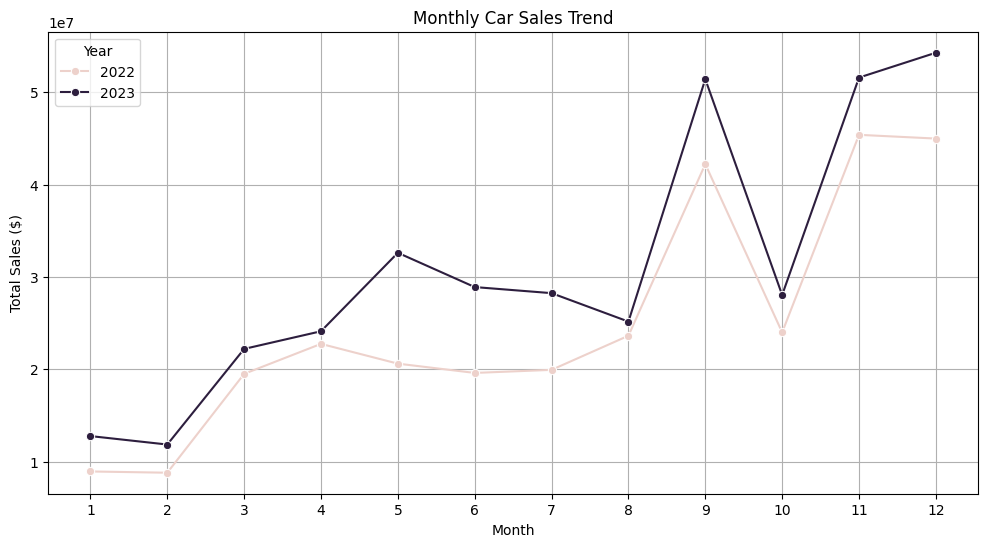

The correlation between month and sales is: 0.8343681605991796


In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Price ($)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Price ($)', hue='Year', data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

correlation = monthly_sales['Month'].corr(monthly_sales['Price ($)'])
print(f"The correlation between month and sales is: {correlation}")


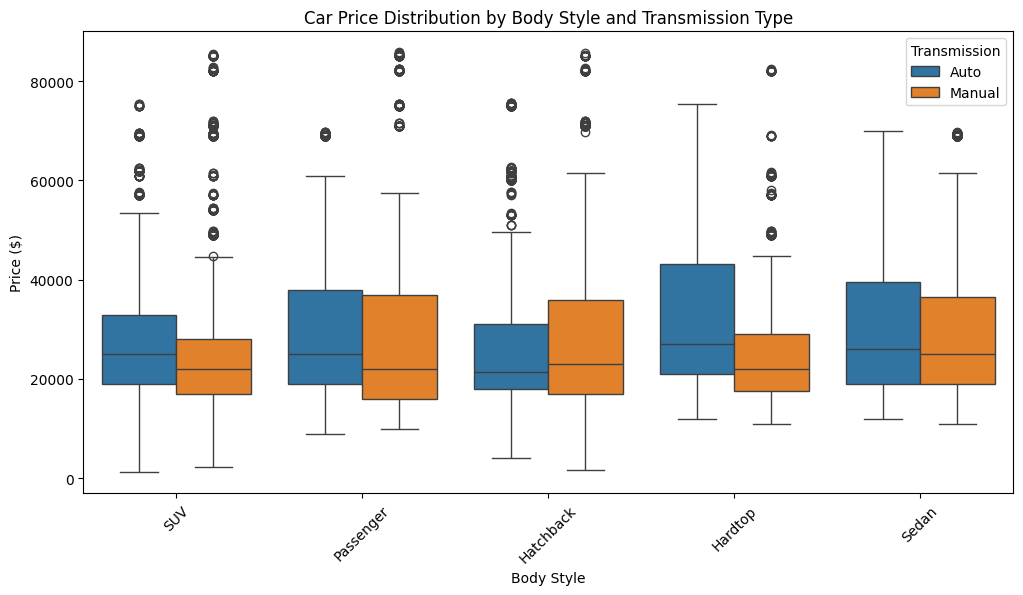

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

grouped_data = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
grouped_data


In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Correlation Matrix
numeric_cols = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# 2. Interaction Plots

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size', y='Price ($)', hue='Annual Income', data=df)
plt.title('Price vs. Engine Size (colored by Annual Income)')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Engine Size', data=df)
plt.title('Price vs. Annual Income (colored by Engine Size)')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()




In [ ]:
#15. How does the average car price vary across different car models and engine types

import matplotlib.pyplot as plt

average_price_by_engine = df.groupby('Engine Size')['Price ($)'].mean()

print(average_price_by_engine)

plt.figure(figsize=(10, 6))
average_price_by_engine.plot(kind='bar')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


#EDA-3

In [1]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
#1. Using dataframe df: What is the average rating for each product category

import pandas as pd

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

average_rating_by_category = df.groupby('category')['rating'].mean()

average_rating_by_category


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [13]:
#2. Using dataframe df: What are the top rating_count products by category

import pandas as pd

def convert_rating_count(x):
    try:
        return int(x.replace(',', ''))
    except:
        return 0

df['rating_count_numeric'] = df['rating_count'].apply(convert_rating_count)

top_products = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count_numeric'))

print(top_products[['product_name', 'category', 'rating_count_numeric']])

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
Computers&Accessories|Accessories&Peripherals|A... 844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
OfficeProd

<ipython-input-13-cd714d0358e6>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count_numeric'))


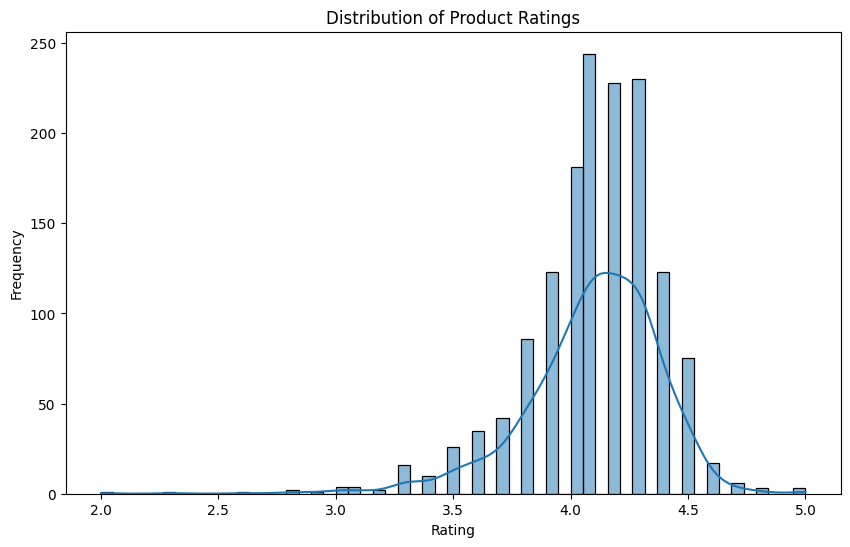

The correlation between rating and rating count is: 0.1015835456607773


In [11]:
#3. What is the distribution of discounted prices vs. actual prices

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

correlation = df['rating'].corr(df['rating_count_numeric'])
print(f"The correlation between rating and rating count is: {correlation}")


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

<ipython-input-12-815133a78ff5>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


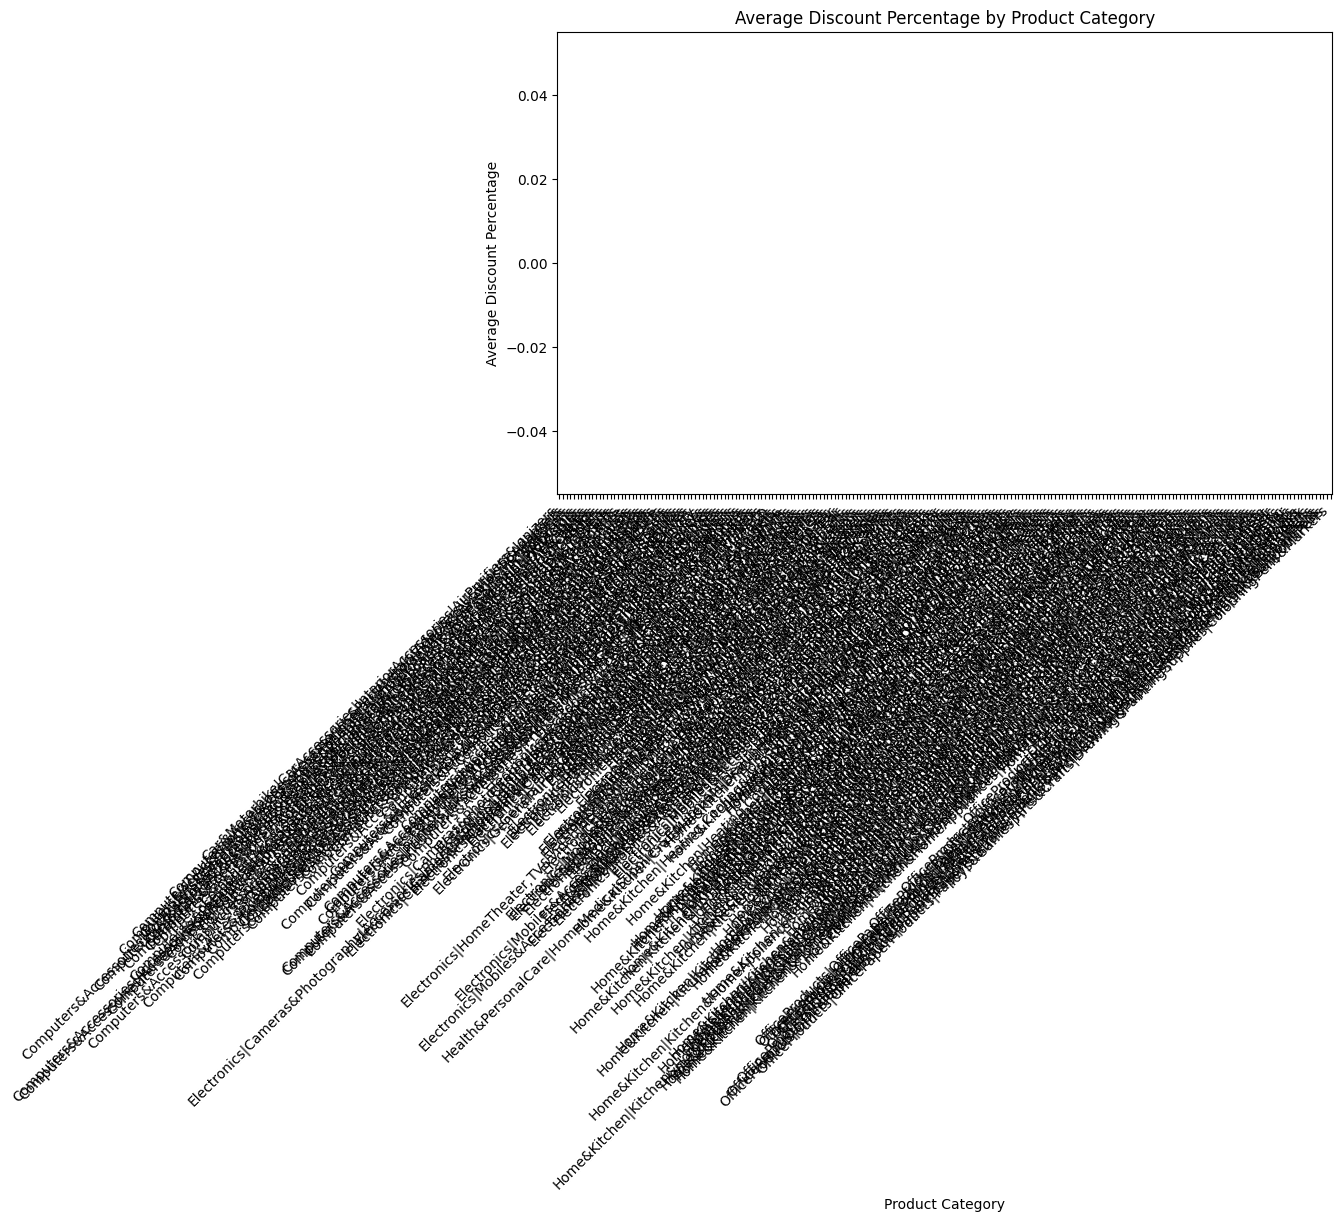

In [12]:
#4. How does the average discount percentage vary across categories

import pandas as pd
import matplotlib.pyplot as plt

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

average_discount_by_category = df.groupby('category')['discount_percentage'].mean()

print(average_discount_by_category)

plt.figure(figsize=(10, 6))
average_discount_by_category.plot(kind='bar')
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
#5. What are the most popular product names


# 1. Top 5 most frequent product names:
top_product_names = df['product_name'].value_counts().head(5)
print("Top 5 most frequent product names:\n", top_product_names)

# 2. (Alternative) Top 5 product names with highest rating counts:
top_rated_products = df.nlargest(5, 'rating_count_numeric')
print("\nTop 5 product names with the highest rating counts:\n", top_rated_products[['product_name', 'rating_count_numeric']])


Top 5 most frequent product names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution     5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating              4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                               3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black    3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                   3
Name: count, dtype: int64

Top 5 product names with the highest rating counts:
                                           product_name  rating_count_nu

In [16]:
#6. What are the most popular product keywords

import pandas as pd

def convert_rating_count(x):
    try:
        return int(x.replace(',', ''))
    except:
        return 0

df['rating_count_numeric'] = df['rating_count'].apply(convert_rating_count)

top_product_names = df['product_name'].value_counts().head(5)
print("Top 5 most frequent product names:\n", top_product_names)

top_rated_products = df.nlargest(5, 'rating_count_numeric')
print("\nTop 5 product names with the highest rating counts:\n", top_rated_products[['product_name', 'rating_count_numeric']])


Top 5 most frequent product names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution     5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating              4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                               3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black    3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                   3
Name: count, dtype: int64

Top 5 product names with the highest rating counts:
                                           product_name  rating_count_nu

In [17]:
#7. What are the most popular product reviews



def convert_rating_count(x):
    try:
        return int(x.replace(',', ''))
    except:
        return 0

df['rating_count_numeric'] = df['rating_count'].apply(convert_rating_count)

top_reviews = df.nlargest(10, 'rating_count_numeric')

print(top_reviews[['product_name', 'rating_count_numeric', 'rating', 'review_title']])


                                          product_name  rating_count_numeric  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...                426973   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...                426973   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...                426973   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...                426972   
352  boAt Bassheads 100 in Ear Wired Earphones with...                363713   
400  boAt Bassheads 100 in Ear Wired Earphones with...                363713   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...                363711   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...                313836   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...                313836   
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...                313832   

     rating                                       review_title  
12      4.4  It's quite good and value for money,Works

In [18]:
# 8. What is the correlation between discounted_price and rating

correlation = df['discounted_price'].corr(df['rating'])
print(f"The correlation between discounted_price and rating is: {correlation}")


The correlation between discounted_price and rating is: 0.12033741712288548


In [19]:
# 9.  What are the Top 5 categories based on the highest rating

import pandas as pd

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

top_categories = df.groupby('category')['rating'].mean().nlargest(5)

top_categories


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|Components|Memory,4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


In [27]:
# prompt:  Identify any potential areas for improvement or optimization based on the data analysis

# Improvements and Optimizations for the provided code:

# 1.  Data Cleaning and Preprocessing:
#     -  Handle Missing Values more robustly: Instead of just visualizing missing values, impute them using appropriate methods (mean, median, mode, or more advanced techniques like KNN imputation) based on the nature of the data.  Consider removing rows with a high percentage of missing values if imputation isn't suitable.
#     -  Outlier Treatment: The IQR method for outlier removal is a good start. Consider using other methods (e.g., Z-score, modified Z-score) or visualization techniques (box plots) to explore outliers further.  Be cautious about removing too many data points, especially if they represent legitimate but extreme cases.
#     - Data Type Conversion: Explicitly convert columns to the correct data type to avoid errors later on (e.g., converting 'year', 'km_driven', 'selling_price' etc. to numeric). This was done for 'rating' and 'rating_count_numeric' in your third EDA.  Do this for all potentially numeric fields from all three EDA sections.
#     -  Consistent Naming Conventions: Use a consistent naming convention for variables and functions (e.g., snake_case).

# 2. Enhanced Analysis:
#     - Deeper Bivariate Analysis: Instead of just correlation coefficients and scatter plots, explore more detailed bivariate relationships using regression analysis (linear, polynomial) and explore interactions between variables.
#     - Multivariate Analysis: Incorporate multiple variables into your analysis to understand their combined effects.  Use techniques like multiple linear regression, or data visualization techniques like 3D scatter plots (with appropriate dimensionality reduction if necessary).
#     - Feature Engineering: Create new features from existing ones that could be more informative. For example, in the bike dataset, instead of just "year," you could create a "bike_age" feature, which is already present but the way it's calculated can be improved; make sure it's accurate and consistent.
#     - Categorical Variable Encoding: Consider one-hot encoding or label encoding for categorical variables like 'seller_type', 'owner' (in the bike data), etc. before performing any statistical analysis or modeling involving those variables.
#     - Segmentation: Segment data based on meaningful criteria and analyze segments separately. This can reveal insights that might be hidden in the overall dataset.


#3.  Visualization improvements
#     -  More Informative Plots: Use a wider variety of plot types beyond histograms and scatter plots, such as box plots, violin plots, and density plots, to explore data distributions and relationships.
#     - Label plots with clear titles and axes labels.
#     - Improve the clarity and readability of visualizations by adjusting font sizes, colors, and legend placement.

# 4.  Code Structure and Readability:
#    -  Modularize: Break down the analysis into smaller, reusable functions to improve code organization and reduce redundancy.
#    -  Comments: Add comments to explain the purpose of code blocks and complex operations.
#    -  Error Handling: Improve error handling to catch unexpected data types or missing values during calculations or data conversions.

# Example of an improved handling of missing values:
# (replace the code in section 7)

def handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values)

    # Example: Impute missing 'selling_price' with the median
    if 'selling_price' in df.columns and df['selling_price'].isnull().any():
        median_price = df['selling_price'].median()
        df['selling_price'].fillna(median_price, inplace=True)

    # Handle other columns similarly, based on your domain knowledge or data exploration

    return df

df = handle_missing_values(df)


Missing Values:
 product_id                 0
product_name               0
category                   0
discounted_price           0
actual_price               0
discount_percentage     1465
rating                     1
rating_count               2
about_product              0
user_id                    0
user_name                  0
review_id                  0
review_title               0
review_content             0
img_link                   0
product_link               0
actual_price_numeric       0
rating_count_numeric       0
dtype: int64


#EDA-4

In [28]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [30]:
#1. Using dataframe df:  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful

print(df.isnull().sum())

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

print(df.info())



Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows:
              Artist                                         Track Name  \
39      Travis Scott                             MELTDOWN (feat. Drake)   
52      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
72         21 Savage                                            née-nah   
73             Drake                      Jimmy Cooks (feat. 21 Savage)   
76             Drake                                          Rich Flex   
131            Drake               First Person Shooter (feat. J. Cole)   
170     Metro Boomin            Trance (with Travis Scott & Young Thug)   
182   D-Block Europe                                           Overseas   
210      Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
212     Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
222          Cardi B                    WAP (feat. 

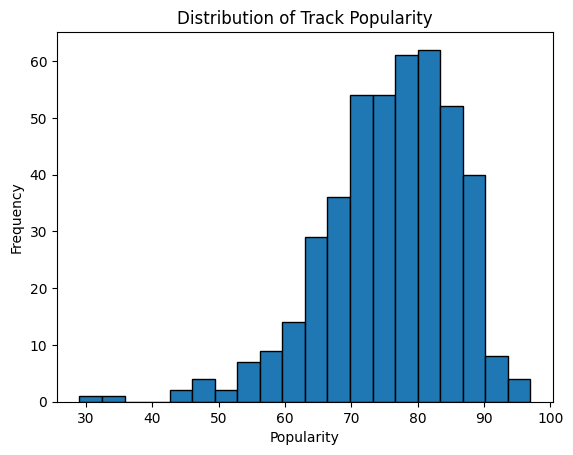

In [34]:
# 2. Using dataframe df: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

import matplotlib.pyplot as plt

plt.hist(df['Popularity'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

plt.show()



In [38]:
# 3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

import plotly.express as px

fig = px.scatter(df, x="Popularity", y="Duration (ms)",
                 title="Relationship between Popularity and Duration of Tracks")

fig.show()



The artist with the highest number of tracks is Drake with 20 tracks.


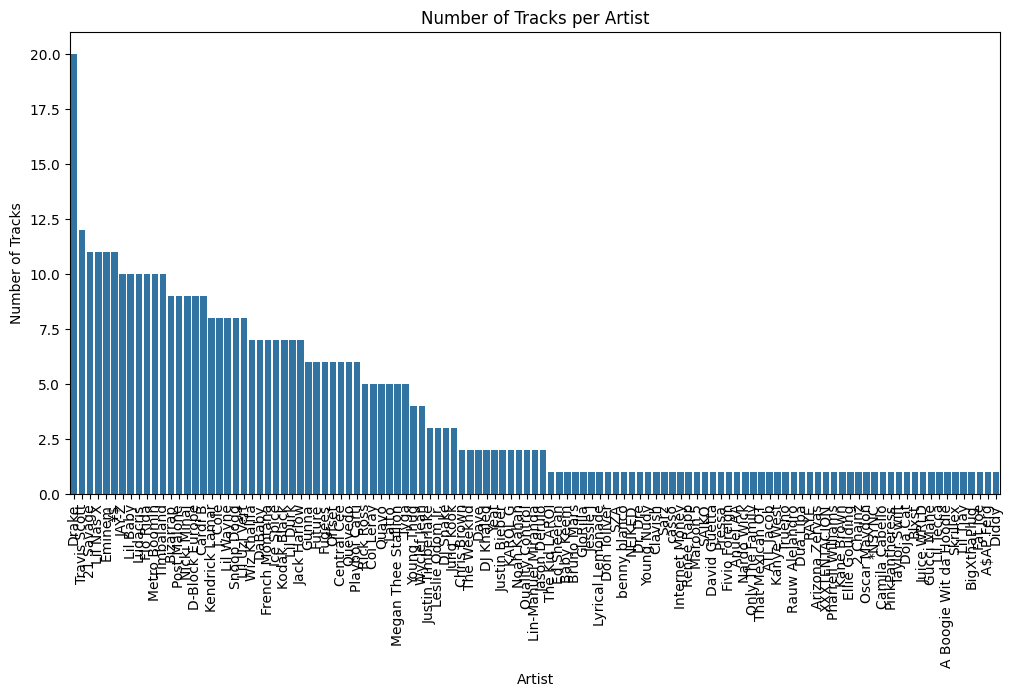

In [40]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a count plot

import matplotlib.pyplot as plt

artist_counts = df['Artist'].value_counts()

highest_count_artist = artist_counts.index[0]
highest_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is {highest_count_artist} with {highest_count} tracks.")

plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=df, order=artist_counts.index)
plt.xticks(rotation=90)
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.show()


In [41]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

least_popular_tracks = df.sort_values(by='Popularity').head(5)

print("Top 5 Least Popular Tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track Name: {row['Track Name']}")


Top 5 Least Popular Tracks:
Artist: Pressa, Track Name: Attachments (feat. Coi Leray)
Artist: Justin Bieber, Track Name: Intentions
Artist: French Montana, Track Name: Splash Brothers
Artist: French Montana, Track Name: Splash Brothers
Artist: Lil Baby, Track Name: On Me - Remix


In [42]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist

import pandas as pd


# 1. Find the top 5 most popular artists
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)

print("Top 5 Most Popular Artists (Average Popularity):\n", top_5_artists)

# 2. Find the artist with the highest average popularity among the top 5
highest_popularity_artist = top_5_artists.idxmax()
highest_average_popularity = top_5_artists.max()

print("\nArtist with the highest average popularity among the top 5:", highest_popularity_artist)
print("Average Popularity:", highest_average_popularity)


Top 5 Most Popular Artists (Average Popularity):
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

Artist with the highest average popularity among the top 5: cassö
Average Popularity: 92.0


In [43]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5).index

most_popular_tracks = {}

for artist in top_5_artists:

    artist_df = df[df['Artist'] == artist]

    most_popular_track = artist_df.loc[artist_df['Popularity'].idxmax()]

    most_popular_tracks[artist] = most_popular_track['Track Name']

for artist, track in most_popular_tracks.items():
    print(f"{artist}: {track}")


cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


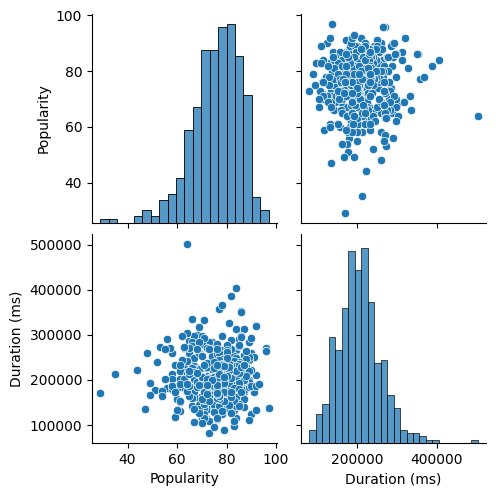

In [46]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

import matplotlib.pyplot as plt
import numpy as np


numeric_cols = df.select_dtypes(include=np.number)

sns.pairplot(numeric_cols)
plt.show()


In [47]:
# prompt: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot

import plotly.express as px

fig = px.box(df, x="Artist", y="Duration (ms)", title="Duration of Tracks across Artists")
fig.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categor

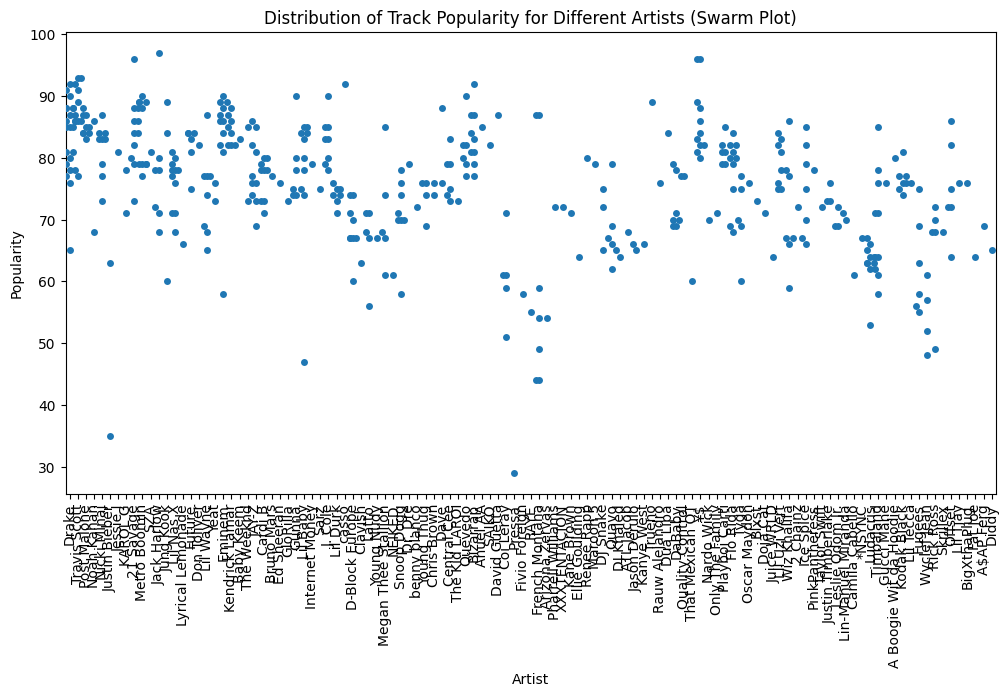

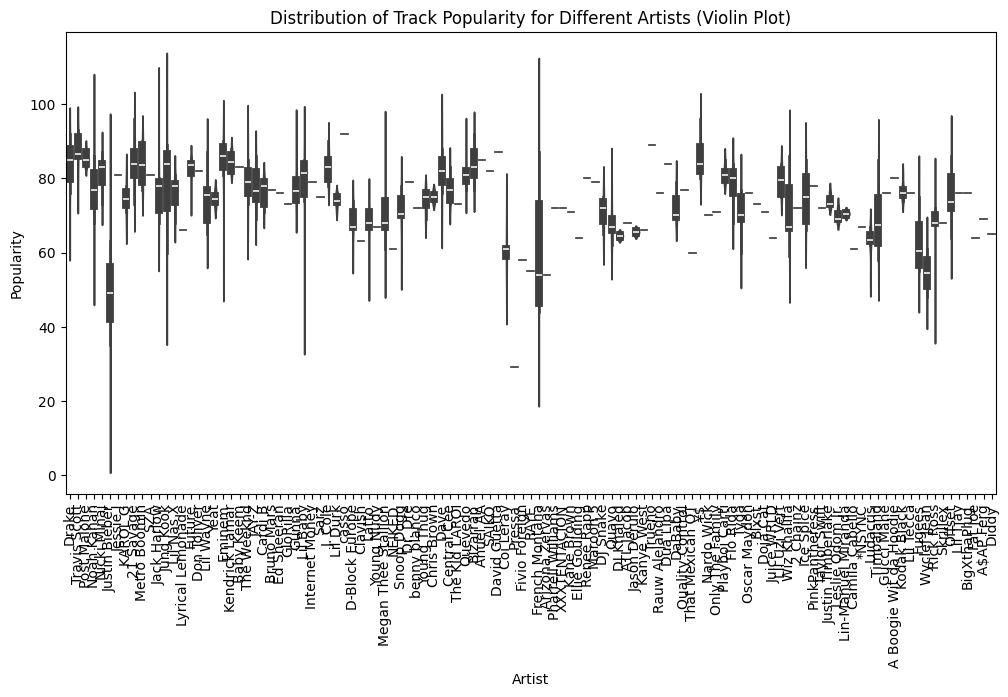

In [49]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity for Different Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity for Different Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()
